Import Block

In [1]:
import numpy as np
import networkx as nx
from scipy.optimize import minimize
import matplotlib.pyplot as plt



pos = {}

In [2]:
Initialization Block

SyntaxError: invalid syntax (<ipython-input-2-d36d96af27af>, line 1)

In [3]:
# total_budget = 40

# a = [
#     [1, 0, 1, 1, 0, 0, 0, 0],
#     [0, 1, 1, 0, 0, 0, 0, 0],
#     [1, 1, 1, 0, 1, 0, 0, 0],
#     [1, 0, 0, 1, 0, 0, 0, 0],
#     [0, 0, 1, 0, 1, 1, 1, 1],
#     [0, 0, 0, 0, 1, 1, 0, 0],
#     [0, 0, 0, 0, 1, 0, 1, 1],
#     [0, 0, 0, 0, 1, 0, 1, 1],
# ]

# d = [
#     [0, 0, 5, 5, 0, 0, 0, 0],
#     [0, 0, 4, 0, 0, 0, 0, 0],
#     [5, 4, 0, 0, 3, 0, 0, 0],
#     [5, 0, 0, 0, 0, 0, 0, 0],
#     [0, 0, 3, 0, 0, 7, 6, 5],
#     [0, 0, 0, 0, 7, 0, 0, 0],
#     [0, 0, 0, 0, 6, 0, 0, 3],
#     [0, 0, 0, 0, 5, 0, 3, 0],
    
# ]

# lanes = [
#     [0, 0, 4, 2, 0, 0, 0, 0],
#     [0, 0, 3, 0, 0, 0, 0, 0],
#     [4, 3, 0, 0, 4, 0, 0, 0],
#     [2, 0, 0, 0, 0, 0, 0, 0],
#     [0, 0, 4, 0, 0, 3, 3, 4],
#     [0, 0, 0, 0, 3, 0, 0, 0],
#     [0, 0, 0, 0, 3, 0, 0, 2],
#     [0, 0, 0, 0, 4, 0, 2, 0],
# ]

# flow = [
#     [0, 0, 400, 200, 0, 0, 0, 0],
#     [0, 0, 200, 0, 0, 0, 0, 0],
#     [400, 200, 0, 0, 600, 0, 0, 0],
#     [200, 0, 0, 0, 0, 0, 0, 0],
#     [0, 0, 600, 0, 0, 300, 300, 500],
#     [0, 0, 0, 0, 300, 0, 0, 0],
#     [0, 0, 0, 0, 300, 0, 0, 200],
#     [0, 0, 0, 0, 500, 0, 200, 0],
# ]

# congestion = []

# nodes = 8


# # p = [
# #     [0.6, 0, 0.2, 0.2, 0, 0, 0, 0],
# #     [0, 0.7, 0.3, 0, 0, 0, 0, 0],
# #     [0.1, 0.2, 0.5, 0, 0.2, 0, 0, 0],
# #     [0.3, 0, 0, 0.7, 0, 0, 0, 0],
# #     [0, 0, 0.1, 0, 0.5, 0.15, 0.15, 0.1],
# #     [0, 0, 0, 0, 0.2, 0.7, 0, 0],
# #     [0, 0, 0, 0, 0.3, 0, 0.4, 0.3],
# #     [0, 0, 0, 0, 0.2, 0, 0.2, 0.6],
# # ]

# gama = [
#     200, 100, 1000, 3500, 1500, 400, 300, 500
# ]

# zones = [0, 0, 0, 0, 0, 0, 0, 0]


# emptycell = -1

# native_frac = 0.3

# installation_rate =5000
# port_cost = 500


In [4]:


# a_nump = np.matrix(d)

# G = nx.from_numpy_matrix(a_nump,parallel_edges=False, create_using=nx.MultiGraph)

# print(G.nodes())
# print(G.edges())
# print(G)

# nx.draw(G, with_labels = True)
# plt.savefig("testing.png")



In [5]:
#a[i][j]=0 means no direct connecting road between i and j
#a[i][j] =1 means there is a road connecting i and j'th node

total_budget = 80

a = [
    [1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1],
    [0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0],
    [1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1],
    [0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0],
    [1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0],
    [0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1],
    [0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0],
    [0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0],
    [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1],
    [1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1],  
]

#d[i][j] represents the length of road connecting i and j, 0 means no direct connection.
# I've provided floating point numbers for distance vectors.

d = [
    [0, 0, 10, 0, 0, 8, 0, 5, 0, 0, 0, 0, 0, 0, 0, 15],
    [0, 0, 4.4, 0, 0, 7, 10, 0, 0, 0, 0, 0, 4, 0, 0, 0],
    [10, 4.4, 0, 15.7, 0, 4.1, 0, 0, 0, 0, 0, 7, 3.7, 0, 0, 8.3],
    [0, 0, 5.7, 0, 11, 10.6, 6.5, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 11, 0, 0, 11.7, 3, 0, 0, 0, 0, 0, 0, 11.9, 0],
    [8, 7, 4.1, 10.6, 0, 0, 0, 0, 6.8, 1, 0, 0, 0, 0, 0, 0],
    [0, 10, 0, 6.5, 11.7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [5, 0, 0, 0, 3, 0, 0, 0, 0, 8.3, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 6.8, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 1, 0, 8.3, 0, 0, 9.1, 0, 0, 0, 0, 7.2],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 9.1, 0, 0, 0, 17, 0, 3.3],
    [0, 0, 7, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 12.3, 0, 0],
    [0, 4, 3.7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 17, 12.3, 0, 0, 0, 0],
    [0, 0, 0, 0, 11.9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8.2],
    [15, 0, 8.3, 0, 0, 0, 0, 0, 0, 7.2, 3.3, 0, 0, 0, 8.2, 0],  
]  

#lanes[i][j] represent the no. of lanes in the road connecting i ,j

lanes = [
    [0, 0, 3, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 3],
    [0, 0, 2, 0, 0, 2, 3, 0, 0, 0, 0, 0, 4, 0, 0, 0],
    [3, 2, 0, 4, 0, 2, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2],
    [0, 0, 4, 0, 3, 3, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 3, 0, 0, 4, 3, 0, 0, 0, 0, 0, 0, 3, 0],
    [2, 2, 2, 3, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0],
    [0, 3, 0, 2, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [2, 0, 0, 0, 3, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 2, 0, 3, 0, 0, 2, 0, 0, 0, 0, 2],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 4, 0, 2],
    [0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0],
    [0, 4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 2, 0, 0, 0, 0],
    [0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3],
    [3, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 3, 0],  
]

#flow[i][j] is the traffic flow between i, j in peak time

flow = [
    [0, 0, 100, 0, 0, 300, 0, 12, 0, 0, 0, 0, 0, 0, 0, 150],
    [0, 0, 440, 0, 0, 170, 160, 0, 0, 0, 0, 0, 420, 0, 0, 0],
    [110, 240, 0, 800, 0, 210, 0, 0, 0, 0, 0, 20, 230, 0, 0, 120],
    [0, 0, 190, 0, 310, 376, 145, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 695, 0, 0, 420, 120, 0, 0, 0, 0, 0, 0, 50, 0],
    [337, 483, 173, 668, 0, 0, 0, 0, 468, 7, 0, 0, 0, 0, 0, 0],
    [0, 600, 0, 380, 750, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [83, 0, 0, 0, 58, 0, 0, 0, 0, 682, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 578, 0, 0, 0, 0, 0, 40, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 43, 0, 582, 0, 0, 510, 0, 0, 0, 0, 100],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 675, 0, 0, 0, 1100, 0, 180],
    [0, 0, 710, 0, 0, 0, 0, 0, 75, 0, 0, 0, 0, 600, 0, 0],
    [0, 175, 30, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1000, 900, 0, 0, 0, 0],
    [0, 0, 0, 0, 569, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 478],
    [930, 0, 670, 0, 0, 0, 0, 0, 0, 650, 80, 0, 0, 0, 580, 0],  
] 



congestion = []


#no. of nodes
nodes = 16


# p[i][j] is the fraction of ev's of zone i that charges at zone j
# sum of p[i][j] for j=0 to j=nodes-1 is always 1 for every i=0 to i=nodes-1
#i.e. sum of row is 1


# p = [
#     [0.3, 0, 0.1, 0, 0, 0.2, 0, 0.3, 0, 0, 0, 0, 0, 0, 0, 0.1],
#     [0, 0.4, 0.2, 0, 0, 0.2, 0.1, 0, 0, 0, 0, 0, 0.1, 0, 0, 0],
#     [0, 0.1, 0.3, 0.4, 0, 0.1, 0, 0, 0, 0, 0, 0, 0.1, 0, 0, 0],
#     [0, 0, 0.2, 0.4, 0.1, 0.1, 0.2, 0, 0, 0, 0, 0, 0, 0, 0, 0],
#     [0, 0, 0, 0.3, 0.2, 0, 0.1, 0.3, 0, 0, 0, 0, 0, 0, 0.1, 0],
#     [0.1, 0.1, 0.2, 0.1, 0, 0.2, 0, 0, 0.1, 0.2, 0, 0, 0, 0, 0, 0],
#     [0, 0.1, 0, 0.3, 0.4, 0, 0.2, 0, 0, 0, 0, 0, 0, 0, 0, 0],
#     [0.1, 0, 0, 0, 0.3, 0, 0, 0.5, 0, 0.1, 0, 0, 0, 0, 0, 0],
#     [0, 0, 0, 0, 0, 0.6, 0, 0, 0.3, 0, 0, 0.1, 0, 0, 0, 0],
#     [0, 0, 0, 0, 0, 0.7, 0, 0, 0, 0.1, 0, 0, 0, 0, 0, 0.2],
#     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.3, 0.3, 0, 0, 0.2, 0, 0.1],
#     [0, 0, 0.4, 0, 0, 0, 0, 0, 0.3, 0, 0, 0, 0, 0.3, 0, 0],
#     [0, 0.1, 0.7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.2, 0, 0, 0],
#     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.9, 0, 0.1, 0, 0],
#     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.8, 0.2],
#     [0.3, 0, 0.4, 0, 0, 0, 0, 0, 0, 0.1, 0.05, 0, 0, 0, 0.05, 0.1],  
# ]


#gama is the ev population at each node

gama = [
    700, 200, 300, 100, 500, 1000, 2500, 700, 1500, 400, 800, 300, 50, 500, 150, 400
]


#should be -1 for now


emptycell = -1

native_frac = 0.2

# installation_rate = 500
installation_rate =5000
port_cost = 500

In [6]:
######################## basic functions ############################

def print_pretty(arr):
    print(" ")
    for i in range(nodes):
        for j in range(nodes):
            print(arr[i][j], end="\t")
        print("")
    return 

def initialize_empty(arr):
    for i in range(nodes):
        tmp = []
        for j in range(nodes):
            tmp.append(0)
        arr.append(tmp)
        
    return


In [7]:
################################# flow to p dependency ###########################
support_mat = []
p = []


def create_support_mat(support_mat):
    
    
    norm_fact = 1
    
    global nodes
    global flow
    global lanes
    global d
    global a
    
    for i in range(nodes):
        for j in range(nodes):
            if a[i][j] != 0 and i != j:
                support_mat[i][j] = flow[i][j] / (lanes[i][j] * d[i][j] * 0.004)
                if norm_fact > support_mat[i][j] or norm_fact == 1:
                    norm_fact = support_mat[i][j]

    return (support_mat, norm_fact)


def normalize(support_mat, norm_fact):
    global nodes
    global a
    
    for i in range(nodes):
        for j in range(nodes):
            if a[i][j] != 0 and i != j:
                support_mat[i][j] = norm_fact /support_mat[i][j]
    return support_mat



def flow_to_p_dependency(support_mat, p):
    initialize_empty(support_mat)
    initialize_empty(p)
    support_mat, norm_fact = create_support_mat(support_mat)
    support_mat = normalize(support_mat, norm_fact)
    global nodes
    for i in range(nodes):
        total = 0
        for j in range(nodes):
            total = total + support_mat[i][j]
        
        for j in range(nodes):
            
            p[i][j] = support_mat[i][j] * 0.6 / total
            if i == j:
                p[i][j] = 0.4
            
            p[i][j] = round(p[i][j], 3)
        
    return p

p = flow_to_p_dependency(support_mat, p)

# print("\n", "\n", support_mat)
# print("\n", "\n", p)

print_pretty(support_mat)
print_pretty(p)




 
0	0	0.36	0	0	0.064	0	1.0	0	0	0	0	0	0	0	0.36	
0	0	0.024	0	0	0.0988235294117647	0.22499999999999998	0	0	0	0	0	0.045714285714285714	0	0	0	
0.32727272727272727	0.044000000000000004	0	0.09419999999999999	0	0.046857142857142854	0	0	0	0	0	0.8400000000000001	0.03860869565217392	0	0	0.166	
0	0	0.144	0	0.12774193548387097	0.10148936170212763	0.10758620689655174	0	0	0	0	0	0	0	0	0	
0	0	0	0.056978417266187055	0	0	0.1337142857142857	0.09000000000000001	0	0	0	0	0	0	0.8568	0	
0.05697329376854599	0.034782608695652174	0.056878612716763	0.057125748502994005	0	0	0	0	0.03487179487179487	0.34285714285714286	0	0	0	0	0	0	
0	0.06	0	0.041052631578947375	0.07488	0	0	0	0	0	0	0	0	0	0	0	
0.14457831325301204	0	0	0	0.18620689655172418	0	0	0	0	0.043812316715542525	0	0	0	0	0	0	
0	0	0	0	0	0.02823529411764706	0	0	0	0	0	0.12	0	0	0	0	
0	0	0	0	0	0.05581395348837209	0	0.05134020618556701	0	0	0.042823529411764705	0	0	0	0	0.17280000000000004	
0	0	0	0	0	0	0	0	0	0.032355555555555554	0	0	0	0.07418181818181818	0	0.04400000000000

In [8]:



yij = []
rst = []
        
initialize_empty(rst)
initialize_empty(yij)


    

def copyAdd(first, second):
    for i in range(0, nodes):
        for j in range(0, nodes):
            second[i][j] = second[i][j] + first[i][j]
    return


     

def recurr(times, curr, rst, yij, emptycell, config):
    if curr == times:
        for i in range(nodes):
            for j in range(nodes):
                yij[i][j] = yij[i][j] + rst[i][j]
        return
    
    lvl2 = []
    initialize_empty(lvl2)
            
    
    for i in range(nodes):
        for j in range(nodes):
            temp = rst[i][j]
            for k in range(nodes):
                if j == emptycell:
                    rst[i][j] = rst[i][j] - temp * config[k]
                    lvl2[j][k] = lvl2[j][k] + temp * config[k]
                else:
                    rst[i][j] = rst[i][j] - temp * p[j][k]
                    lvl2[j][k] = lvl2[j][k] + temp * p[j][k]
                
    copyAdd(rst, yij)   
    
    
    recurr(times, curr+1, lvl2, yij, emptycell, config)
            
    return
            
                
            
       
    
def reset(arr):
    for i in range(nodes):
        for j in range(nodes):
            arr[i][j] = 0
    return




def create_probab_confi_empty(emptycell):
    
    if emptycell == -1:
        return []
    
    config = []
    conn = 0
    for i in range(nodes):
        conn = conn + a[emptycell][i]
    conn = conn - 1
    frac = 1/conn
    for i in range(nodes):
        config.append(a[emptycell][i] * frac)
    config[emptycell] = 0;
    
    print(config)
    return config


def calculate_yij(rst, yij, emptycell):
    
    reset(yij)
    reset(rst)
    
    config = create_probab_confi_empty(emptycell)
    
    
    for i in range(0, nodes):
        for j in range(0, nodes):
            if i == emptycell:
                rst[i][j] = gama[i] * config[j]
            else:
                rst[i][j] = gama[i] * p[i][j]
            
    ################# recur times #################
    print_pretty(rst)
        
    recurr(1, 0, rst, yij, emptycell, config)
        
    ###############################################
    
    #round yij
    for i in range(nodes):
        for j in range(nodes):
            yij[i][j] = round(yij[i][j])
            
    return yij




    



yij = calculate_yij(rst, yij, emptycell)

    
print_pretty(yij)

# print_pretty(congestion)


    

 
280.0	0.0	84.7	0.0	0.0	15.399999999999999	0.0	235.20000000000002	0.0	0.0	0.0	0.0	0.0	0.0	0.0	84.7	
0.0	80.0	7.3999999999999995	0.0	0.0	30.2	68.60000000000001	0.0	0.0	0.0	0.0	0.0	14.000000000000002	0.0	0.0	0.0	
37.8	5.1000000000000005	120.0	10.799999999999999	0.0	5.3999999999999995	0.0	0.0	0.0	0.0	0.0	97.2	4.5	0.0	0.0	19.2	
0.0	0.0	18.0	40.0	15.9	12.7	13.4	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	
0.0	0.0	0.0	15.0	200.0	0.0	35.5	23.5	0.0	0.0	0.0	0.0	0.0	0.0	226.0	0.0	
59.0	36.0	58.0	59.0	0.0	400.0	0.0	0.0	36.0	353.0	0.0	0.0	0.0	0.0	0.0	0.0	
0.0	512.5	0.0	350.00000000000006	637.5	0.0	1000.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	
162.4	0.0	0.0	0.0	208.6	0.0	0.0	280.0	0.0	49.00000000000001	0.0	0.0	0.0	0.0	0.0	0.0	
0.0	0.0	0.0	0.0	0.0	171.0	0.0	0.0	600.0	0.0	0.0	729.0	0.0	0.0	0.0	0.0	
0.0	0.0	0.0	0.0	0.0	41.6	0.0	38.0	0.0	160.0	32.0	0.0	0.0	0.0	0.0	128.4	
0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	103.2	320.0	0.0	0.0	236.79999999999998	0.0	140.0	
0.0	0.0	31.2	0.0	0.0	0.0	0.0	0.0	84.30000000000001	0.0	0

In [15]:
yi = []

# for i in range(0, nodes):
#     tmp = []
#     for j in range(0, nodes):
#         tmp.append(gama[i]*p[i][j])
#     yij.append(tmp)

for i in range(0, nodes):
    tmp = 0
    for j in range(0,nodes):
        if i!=j:
            tmp = tmp + yij[j][i]
    yi.append(tmp)


    
# 1 out of T evs will charge at peak hours
T = 4


# No. of chargers in charging zone (proportional to no. of evs in that zone)

xi = []

k = 0.40
for i in range(0, nodes):
    xi.append(round(gama[i]*k))
    
    

#kij = 1/capacity


## 4 meter of length per car

capacity = []

for i in range(0, nodes):
    tmp = []
    for j in range(0, nodes):
        tmp.append(lanes[i][j]*d[i][j]/0.004)
    capacity.append(tmp)



for i in range(0, nodes):
    tmp = []
    for j in range(0, nodes):
        
        alpha = 0
        if d[i][j] != 0:
            alpha = ((flow[i][j]) + (yij[i][j]/T))/capacity[i][j]
        tmp.append(alpha)
        
    congestion.append(tmp)


#serving rate of chargers (evs it can charge in unit time)
serve_rate = 3
    
#fij = lambd * dij * apha_ij
lambd = 1

print_pretty(congestion)

 
0	0	0.015733333333333332	0	0	0.0758125	0	0.0247	0	0	0	0	0	0	0	0.014933333333333333	
0	0	0.20272727272727273	0	0	0.0555	0.028666666666666667	0	0	0	0	0	0.1078125	0	0	0	
0.0162	0.10977272727272727	0	0.05116242038216561	0	0.10329268292682926	0	0	0	0	0	0.014214285714285714	0.12513513513513513	0	0	0.030361445783132532	
0	0	0.03706140350877193	0	0.03984848484848485	0.04918238993710693	0.04953846153846154	0	0	0	0	0	0	0	0	0	
0	0	0	0.08524242424242424	0	0	0.03758547008547009	0.059111111111111114	0	0	0	0	0	0	0.019663865546218486	0	
0.08675	0.1397142857142857	0.08914634146341463	0.08528301886792454	0	0	0	0	0.13941176470588235	0.1335	0	0	0	0	0	0	
0	0.08763333333333333	0	0.12892307692307692	0.0701923076923077	0	0	0	0	0	0	0	0	0	0	0	
0.0466	0	0	0	0.04488888888888889	0	0	0	0	0.11116465863453816	0	0	0	0	0	0	
0	0	0	0	0	0.17602941176470588	0	0	0	0	0	0.12725	0	0	0	0	
0	0	0	0	0	0.122	0	0.09610441767068273	0	0	0.1151098901098901	0	0	0	0	0.043125	
0	0	0	0	0	0	0	0	0	0.15302197802197803	0	0	0	0.06755882352941

In [16]:
# print(yij)
# print(congestion)
print(yi)
print(sum(yi))


[296, 265, 383, 242, 642, 331, 363, 316, 314, 398, 399, 554, 51, 417, 568, 522]
6061


In [17]:
edge_reference = []

def function_gi(xi, emptycell):
    global nodes
    global serve_rate
    global T
    global yi
    global native_frac
    
    
    gi = []
    for i in range(0, nodes):
        tmp = 0
        if i != emptycell and xi[i] !=0 :
            tmp = (yi[i] + (yij[i][i]*native_frac))/(serve_rate*T*xi[i])
        gi.append(tmp)
    return gi


def dynamic_cost(cost):
    for i in range(len(cost)):
        tmp = 0
        if cost[i]>5000:
            tmp = tmp + (cost[i]-5000)*1.3
            cost[i] = 5000
        if cost[i]>2000:
            tmp = tmp + (cost[i]-2000)*1.2
            cost[i] = 2000
        if cost[i]>0:
            tmp = tmp + cost[i]
        cost[i] = tmp
    return cost



def installation_cost(cost, x):
    global installation_rate
    global port_cost
    for i in range(len(cost)):
        cost[i] = cost[i] + x[i]*port_cost + installation_rate
    
    return cost

# yo = [1000]
# print(dynamic_cost(yo))
        
            
            

def function_fij():
    global nodes
    global d
    global congestion
    global lambd
    
    
    fij = []
    for i in range(0, nodes):
        tmp = []
        for j in range(0, nodes):
            tmp.append(lambd* d[i][j]* congestion[i][j])
        fij.append(tmp)
    return fij
        

distance = []
    
for i in range(0, nodes):
    global d
    
    tmp = []
    for j in range(0, nodes):
        if d[i][j]!=0:
            tmp.append(d[i][j])
        else:
            if i == j:
                tmp.append(0)
            else:
                tmp.append(-1)
    distance.append(tmp)
        

    
print(distance)



def compute_ci(xi, emptycell):
    global nodes
    global yi
    global p
    
    ci = []
    gi = function_gi(xi, emptycell)
    fij = function_fij()
    for i in range(0, nodes):
        tmp = 0
        for j in range(0, nodes):
            tmp = tmp + yi[i]*p[i][j]*(fij[i][j] + gi[j])
        ci.append(tmp)
        
    ci = installation_cost(ci, xi)
    ci = dynamic_cost(ci)
    
    
    return (ci)


            

def compute_epsilon(xi):
    global lambd
    global nodes
    global p
    global yi
    global T
    global d
    
    eij = []
    
    
    for i in range(0, nodes):
        tmp = []
        for j in range(0, nodes):
            kij = 1/capacity[i][j]
            t1 = (lambd * d[i][j] * kij) + (1/(serve_rate*xi[j]))*p[i][j]*yi[i]/T
            t2 = lambd * d[i][j] * congestion[i][j]
            t3 = yi[j]/(serve_rate * T * xi[j])
            epsilon = t1 + t2 + t3
            tmp.append(epsilon)
        eij.append(tmp)
    
    
    return eij


costs = []
            
def count_edge():
    global a
    global nodes
    global edge_reference
    count = 0
    for i in range(nodes):
        for j in range(nodes):
            if a[i][j] == 1 and i!=j:
                count = count + 1
                edge_reference[i][j] = count
    
    return count



def objective_function(xi):
    global emptycell
    ci = compute_ci(xi, emptycell)
    global costs
    global nodes
    costs = ci
    
    c = 0
    for i in range(0, nodes):
        c = c + ci[i]
    return c

def constrain1(xi):
    global total_budget
    
    return total_budget - sum(xi)

def checkZero(xi):
    global emptycell
    for i in range(nodes):
        if xi[i] == 0 and i != emptycell:
            return -1
    return 0

    
b = (1, total_budget)

bnds = ()

for i in range(nodes):
    if i == emptycell:
        bnds = bnds + ((0, 0),)
    else:
        bnds = bnds + (b,)
        
print(bnds)


con1 = {'type':'ineq', 'fun':constrain1}
con2 = {'type':'eq', 'fun':checkZero}
cons = [con1]



        

[[0, -1, 10, -1, -1, 8, -1, 5, -1, -1, -1, -1, -1, -1, -1, 15], [-1, 0, 4.4, -1, -1, 7, 10, -1, -1, -1, -1, -1, 4, -1, -1, -1], [10, 4.4, 0, 15.7, -1, 4.1, -1, -1, -1, -1, -1, 7, 3.7, -1, -1, 8.3], [-1, -1, 5.7, 0, 11, 10.6, 6.5, -1, -1, -1, -1, -1, -1, -1, -1, -1], [-1, -1, -1, 11, 0, -1, 11.7, 3, -1, -1, -1, -1, -1, -1, 11.9, -1], [8, 7, 4.1, 10.6, -1, 0, -1, -1, 6.8, 1, -1, -1, -1, -1, -1, -1], [-1, 10, -1, 6.5, 11.7, -1, 0, -1, -1, -1, -1, -1, -1, -1, -1, -1], [5, -1, -1, -1, 3, -1, -1, 0, -1, 8.3, -1, -1, -1, -1, -1, -1], [-1, -1, -1, -1, -1, 6.8, -1, -1, 0, -1, -1, 2, -1, -1, -1, -1], [-1, -1, -1, -1, -1, 1, -1, 8.3, -1, 0, 9.1, -1, -1, -1, -1, 7.2], [-1, -1, -1, -1, -1, -1, -1, -1, -1, 9.1, 0, -1, -1, 17, -1, 3.3], [-1, -1, 7, -1, -1, -1, -1, -1, 2, -1, -1, 0, -1, 12.3, -1, -1], [-1, 4, 3.7, -1, -1, -1, -1, -1, -1, -1, -1, -1, 0, -1, -1, -1], [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 17, 12.3, -1, 0, -1, -1], [-1, -1, -1, -1, 11.9, -1, -1, -1, -1, -1, -1, -1, -1, -1, 0, 8.2], [15

In [18]:
sol = minimize(objective_function, xi, method='SLSQP', bounds = bnds, constraints=cons)


print(sol)

net_xi = [round(g) for g in sol.x]
print(net_xi)



     fun: 200623.71779784476
     jac: array([-58.4609375 , -58.46289062, -58.46875   , -58.4296875 ,
       -58.4765625 , -58.46289062, -58.46484375, -58.45507812,
       -58.46679688, -58.453125  , -58.453125  , -58.45507812,
       388.53320312, -58.47460938, -58.46679688, -58.45898438])
 message: 'Optimization terminated successfully.'
    nfev: 744
     nit: 38
    njev: 38
  status: 0
 success: True
       x: array([4.15267108, 3.16545292, 4.87606508, 2.92777776, 8.65042337,
       4.15850359, 4.66145439, 4.03417408, 4.08163256, 5.13815396,
       5.80007387, 7.44904789, 1.00000001, 5.3182622 , 7.24892868,
       7.33737856])
[4.0, 3.0, 5.0, 3.0, 9.0, 4.0, 5.0, 4.0, 4.0, 5.0, 6.0, 7.0, 1.0, 5.0, 7.0, 7.0]


In [19]:
print(costs)

[11059.868532761731, 10436.554579666059, 12335.902987389825, 9974.811981764138, 17269.347398799975, 11646.967788194246, 12575.241252491689, 11247.069163597303, 11369.894818732042, 12724.098942163066, 13200.190727000685, 16045.345088285989, 6667.359483043247, 13195.451025147395, 15659.196765007902, 15216.417263799432]


In [20]:
# #############################custom check ############################
# test_x = [11,2,5,5,7,3,3,4]
# print(objective_function(test_x))

In [21]:
fij = function_fij()
print(fij)

[[0, 0, 0.15733333333333333, 0, 0, 0.6065, 0, 0.1235, 0, 0, 0, 0, 0, 0, 0, 0.224], [0, 0, 0.8920000000000001, 0, 0, 0.3885, 0.2866666666666667, 0, 0, 0, 0, 0, 0.43125, 0, 0, 0], [0.16199999999999998, 0.48300000000000004, 0, 0.80325, 0, 0.42349999999999993, 0, 0, 0, 0, 0, 0.0995, 0.463, 0, 0, 0.25200000000000006], [0, 0, 0.21125, 0, 0.43833333333333335, 0.5213333333333334, 0.322, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0.9376666666666666, 0, 0, 0.43975000000000003, 0.17733333333333334, 0, 0, 0, 0, 0, 0, 0.23399999999999999, 0], [0.694, 0.978, 0.36549999999999994, 0.9040000000000001, 0, 0, 0, 0, 0.948, 0.1335, 0, 0, 0, 0, 0, 0], [0, 0.8763333333333333, 0, 0.838, 0.8212500000000001, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0.233, 0, 0, 0, 0.13466666666666666, 0, 0, 0, 0, 0.9226666666666667, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 1.1969999999999998, 0, 0, 0, 0, 0, 0.2545, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0.122, 0, 0.7976666666666667, 0, 0, 1.0474999999999999, 0, 0, 0, 0, 0.3105], [0, 0, 0, 0, 0, 0, 0, 0, 

[0, 3, 2, 2, 3, 2, 0, 4, 2, 2, 2, 2, 2, 3, 0, 2, 2, 3, 0, 3, 2, 2, 3, 0, 0, 3, 4, 2, 4, 0, 0, 0, 3, 2, 0, 2, 0, 3, 0, 0, 0, 2, 0, 4, 0]
Position:
{0: array([0.05487616, 0.11998777]), 2: array([-0.18180783, -0.16803416]), 5: array([-0.0710733, -0.301467 ]), 7: array([0.03877864, 0.53120029]), 15: array([0.29024398, 0.37443719]), 1: array([-0.65577201, -0.21943454]), 6: array([-0.76857386,  0.28146246]), 12: array([-0.7327917 , -0.51787162]), 3: array([-0.41679029,  0.09484868]), 11: array([ 0.44848832, -0.59470713]), 4: array([-0.42131942,  0.57269102]), 14: array([-0.02976023,  0.85551996]), 8: array([ 0.16539623, -0.89825514]), 9: array([0.40968074, 0.16222846]), 10: array([0.87042457, 0.05367765]), 13: array([ 1.        , -0.34628388])}


C:\Users\DELL\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


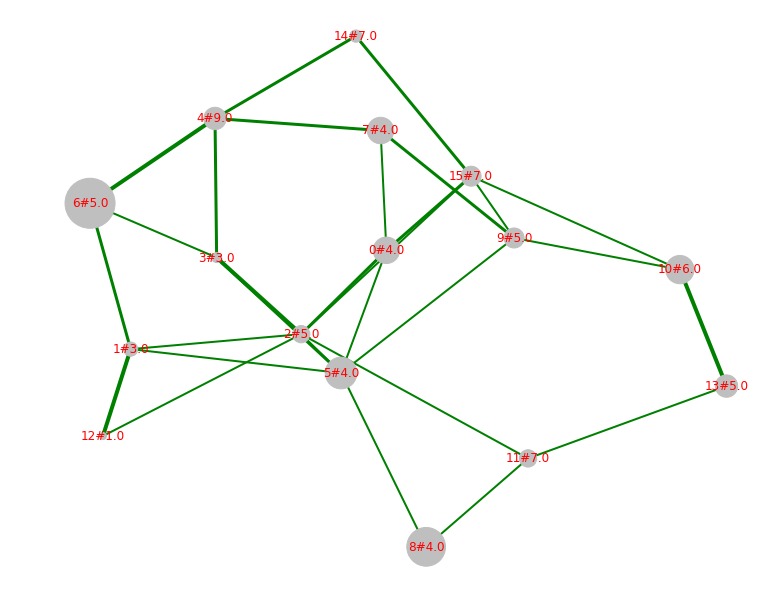

In [22]:



# net_xi = [11,2,2,4,6,8,2,33]

G = nx.Graph()
for i in range(nodes):
    for j in range(nodes):
        if a[i][j] == 1:
            G.add_edge(i, j, weight=lanes[i][j])

# print(G)

weights = [G[u][v]['weight'] for u,v in G.edges()]
print(weights)

net_labels={}
for i in range(nodes):
    net_labels[i] = str(i) + "#" + str(net_xi[i])
    

network_nodes = []

for i in range(nodes):
    network_nodes.append(i)
    

plt.figure(3,(10,8))

if emptycell == -1:
    pos=nx.spring_layout(G)
    
print("Position:")
print(pos)

nx.draw(G, pos, nodelist = network_nodes, node_size = [gm for gm in gama], with_labels=True, width = weights, weight=d, labels = net_labels, font_color = "red", node_color='0.75', edge_color = "green")
# nx.draw_networkx_nodes(G,pos,node_size=700)

if emptycell == -1:
    plt.savefig("before-removing.png", dpi=250)
else:
    
    plt.savefig("after-removing"+str(emptycell)+".png", dpi=250)

